In [1]:
import pandas as pd

In [87]:
import tensorflow as tf

images_train = tf.keras.preprocessing.image_dataset_from_directory(
    '../raw_data/image_train',
    image_size=(32, 32),
    shuffle=True,
    batch_size=32,
    label_mode='int'
)

Found 100000 files belonging to 2 classes.


In [90]:
dataset.class_names

['FAKE', 'REAL']

In [91]:
images_test = tf.keras.preprocessing.image_dataset_from_directory(
    '../raw_data/image_test',
    image_size=(32, 32),
    shuffle=True,
    batch_size=32,
    label_mode='int'
)

Found 20000 files belonging to 2 classes.


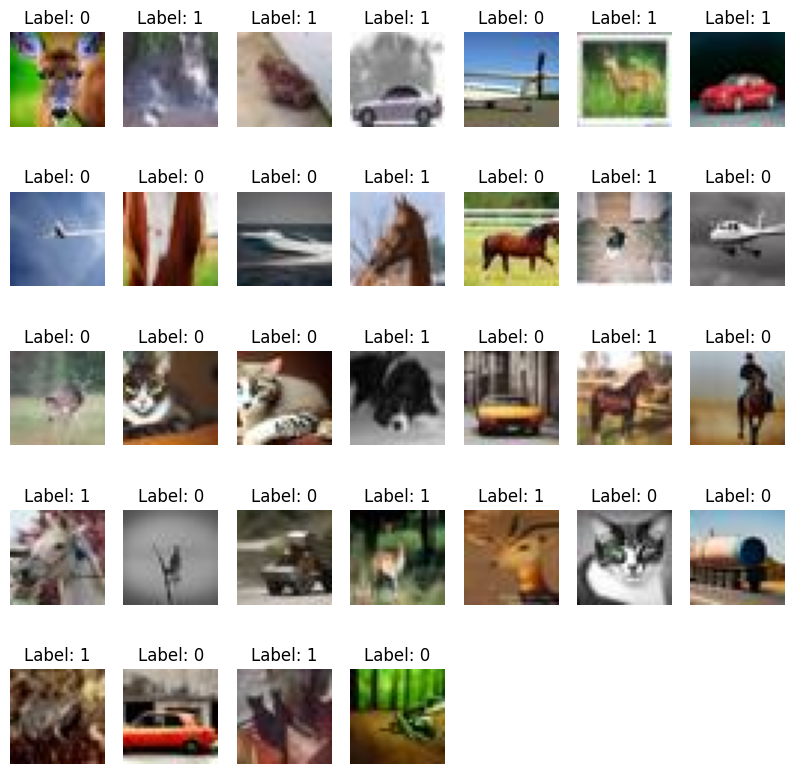

In [92]:
for images, labels in images_train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(32):
        ax = plt.subplot(5, 7, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()